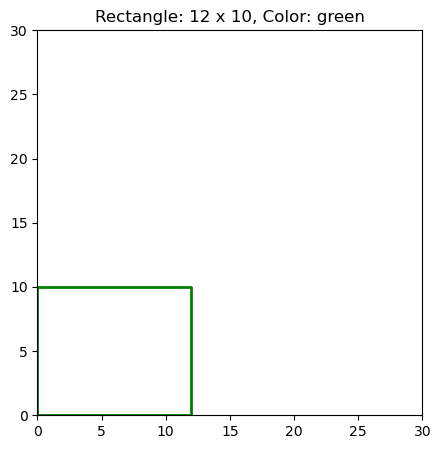

In [1]:
# square_slider.ipynb

import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Widgets
width_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Width:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

height_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Height:',
    continuous_update=False,
    style={'description_width': 'initial'}
)

color_dropdown = widgets.Dropdown(
    options=['blue', 'red', 'green', 'orange', 'purple', 'black', 'pink'],
    value='blue',
    description='Color:',
    style={'description_width': 'initial'}
)

# Button to refresh
refresh_button = widgets.Button(
    description='Refresh Plot',
    button_style='info'
)

def draw_rectangle(width, height, color='blue'):
    """Helper function to draw a rectangle of given width, height, and color."""
    plt.figure(figsize=(5, 5))
    x_coords = [0, width, width, 0, 0]
    y_coords = [0, 0, height, height, 0]
    plt.plot(x_coords, y_coords, color=color, linewidth=2)
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Rectangle: {width} x {height}, Color: {color}")
    plt.show()

def update_plot(_):
    """Update the plot when a widget value changes."""
    clear_output(wait=True)
    display(ui_box)
    draw_rectangle(width_slider.value, height_slider.value, color=color_dropdown.value)

# Box up the widgets in a vertical layout
ui_box = widgets.VBox([
    widgets.HTML("<h3>Adjust the rectangle</h3>"),
    width_slider,
    height_slider,
    color_dropdown,
    refresh_button
])

# Observe changes in the sliders and dropdown
width_slider.observe(update_plot, 'value')
height_slider.observe(update_plot, 'value')
color_dropdown.observe(update_plot, 'value')
refresh_button.on_click(update_plot)

# Display the widgets and draw the initial rectangle
display(ui_box)
draw_rectangle(width_slider.value, height_slider.value, color_dropdown.value)
